## S&P 500 ETF (SPY)
SPY market data obtained from Yahoo finance

Daily prices from 1/1/2020 - 4/11/2021

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

%matplotlib inline

In [4]:
# Read SPY data
df = pd.read_csv("./SPY.csv")
df.head()

# Questions:
# Should we use the close price, or adjusted close price for our analysis
# https://www.investopedia.com/terms/a/adjusted_closing_price.asp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,323.540009,324.890015,322.529999,324.869995,317.873199,59151200
1,2020-01-03,321.160004,323.640015,321.100006,322.410004,315.466217,77709700
2,2020-01-06,320.489990,323.730011,320.359985,323.640015,316.669739,55653900
3,2020-01-07,323.019989,323.540009,322.239990,322.730011,315.779327,40496400
4,2020-01-08,322.940002,325.779999,322.670013,324.450012,317.462311,68296000


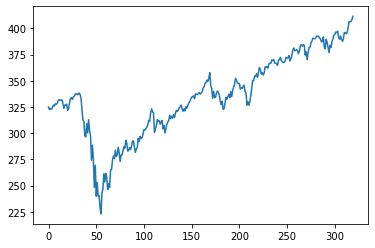

In [12]:
plt.plot(df["Close"])

In [32]:
# Calculate log returns of Close price
log_returns = np.log(df["Close"]) - np.log(df["Close"].shift(1))
log_returns = log_returns[log_returns.notnull()] # Remove the Null at index 0

# Calculate statistics to generate true normal distribution
mu, sigma = norm.fit(log_returns)


# print("observed mu:", mu)
# print("observed sigma:", sigma)

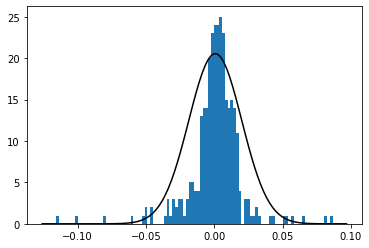

In [35]:
# Plot histogram of observed log returns
plt.hist(log_returns, bins = 100);
xmin, xmax = plt.xlim()
# CL: This plot looks fairly normal to me. I was expecting to see fat tails or other skews.

# Plot normal distribution over histogram of observed log returns
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k')